<a href="https://colab.research.google.com/github/YogaMarta/Pemrograman_Python/blob/main/Tugas_Python_Minggu14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yoga Marta Hermawan - 1101194119 - TT-43-G1

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
frek1 = 700 #MHz
frek2 = 900 #MHz
frek3 = 1800 #MHz
tipe1 = 'urban'
tipe2 = 'suburban'
tipe3 = 'open'
ht = 80 #meter
hr = 1.5 #meter
d = np.random.randint(300,1001,200)
y1=d**2
y2=d**3
y3=d**4

In [24]:
print(d)

[564 407 944 890 333 983 335 644 865 514 601 771 686 727 338 612 304 924
 821 659 738 323 936 895 345 858 612 527 587 878 781 989 771 875 618 798
 913 902 621 403 722 722 914 885 727 495 430 883 946 596 771 339 373 439
 521 365 579 664 658 830 829 461 475 946 786 345 825 498 665 563 679 834
 403 537 929 914 958 679 624 570 396 809 737 371 905 368 596 980 465 328
 545 701 991 955 566 480 445 854 368 715 970 653 999 927 468 381 628 958
 593 915 904 507 668 628 415 463 513 445 493 476 530 711 780 644 903 830
 972 768 429 666 805 338 533 322 324 733 957 330 744 838 693 525 631 787
 535 732 399 320 654 766 401 608 789 689 451 460 440 847 522 620 322 868
 460 326 695 400 622 875 479 922 881 603 565 430 487 314 776 925 423 383
 674 424 937 334 986 729 729 826 557 576 731 874 436 634 710 817 586 854
 474 787]


In [25]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [26]:
#Frekuensi 1800 MHz
LpUrban=cos(frek3,tipe1,ht,hr,d)
LpSuburban=cos(frek3,tipe2,ht,hr,d)
LpOpen=cos(frek3,tipe3,ht,hr,d)

#Model Urban
Lpf=cos(frek1,tipe1,ht,hr,d)
Lpf2=cos(frek2,tipe2,ht,hr,d)
Lpf3=cos(frek3,tipe3,ht,hr,d)

In [27]:
#Frekuensi 1800 MHz
print(LpUrban)
print(LpSuburban)
print(LpOpen)

#Model Urban
print(Lpf)
print(Lpf2)
print(Lpf3)

[184.24441408 179.64890493 191.49983942 190.67009378 176.82220984
 192.07009193 176.90655882 186.11287566 190.26874932 182.93677476
 185.13946324 188.64825259 187.00282867 187.82051856 177.03214275
 185.39495023 175.53874529 191.1981954  189.5333576  186.43720858
 188.03205648 176.39271811 191.37995583 190.74900848 177.3208898
 190.1542929  185.39495023 183.2886107  184.807449   190.47887495
 188.82977878 192.15580966 188.64825259 190.43066188 185.53237803
 189.13310404 191.02949593 190.85875157 185.60059238 179.50978046
 187.72330467 187.72330467 191.044916   190.59073448 187.82051856
 182.40620954 180.42325391 190.55886515 191.52965158 185.02178304
 188.64825259 177.07375648 178.42009529 180.71503911 183.12731614
 178.11469065 184.61415283 186.54368103 186.41581717 189.6869341
 189.66995249 181.40383683 181.82525143 191.52965158 188.91967211
 177.3208898  189.60182062 182.49132302 186.56487928 184.21941631
 186.85835318 189.75465652 179.50978046 183.5533974  191.27421414
 191.044916 

In [28]:
#Frekuensi 1800 MHz
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

#Model Urban
d_sort=d[np.argsort(d)]
f_sort=Lpf[np.argsort(d)]
f2_sort=Lpf2[np.argsort(d)]
f3_sort=Lpf3[np.argsort(d)]

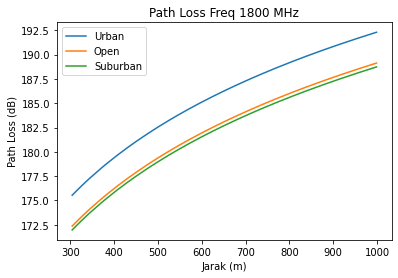

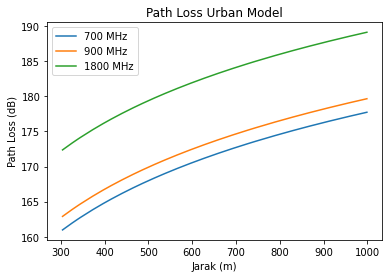

In [29]:
plt.figure()
plt.title('Path Loss Freq 1800 MHz')
plt.plot(d_sort, Urban_sort, label='Urban')
plt.plot(d_sort, Open_sort, label='Open')
plt.plot(d_sort, Suburban_sort, label='Suburban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

#Model Urban
plt.figure()
plt.title('Path Loss Urban Model')
plt.plot(d_sort, f2_sort, label='700 MHz')
plt.plot(d_sort, f_sort, label='900 MHz')
plt.plot(d_sort, f3_sort, label='1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [30]:
#Daya Transmitter
def daytrans (ht, hl, gt, gr):
  dayter = (10*(np.log(ht))) - hl + gt + gr
  dayter = 10**(dayter/10)
  return dayter

power_tran = 30000
gain_tran = 10
gain_rece = 2

In [31]:
PTUrban = daytrans(power_tran, Urban_sort, gain_tran, gain_rece)
PTSuburban = daytrans(power_tran, Suburban_sort, gain_tran, gain_rece)
PTOpen = daytrans(power_tran, Open_sort, gain_tran, gain_rece)
PTUrban2 = daytrans(power_tran, f_sort, gain_tran, gain_rece)
PTUrban3 = daytrans(power_tran, f2_sort, gain_tran, gain_rece)

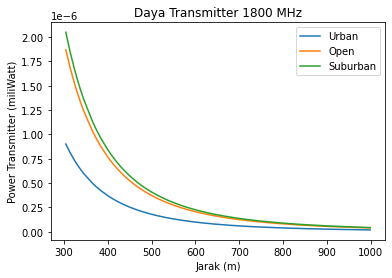

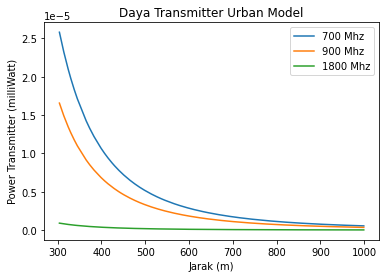

In [32]:
#Frekuensi 1800 MHz
plt.figure()
plt.title("Daya Transmitter 1800 MHz")
plt.plot(d_sort, PTUrban, label = "Urban")
plt.plot(d_sort, PTOpen, label = "Open")
plt.plot(d_sort, PTSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (miliWatt)')
plt.legend()
plt.show()

#Model Urban
plt.figure()
plt.title("Daya Transmitter Urban Model")
plt.plot(d_sort, PTUrban3, label = "700 Mhz")
plt.plot(d_sort, PTUrban2, label = "900 Mhz")
plt.plot(d_sort, PTUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (milliWatt)')
plt.legend()
plt.show()

In [33]:
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [34]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

In [35]:
#Signal to Noise Ratio
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [36]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

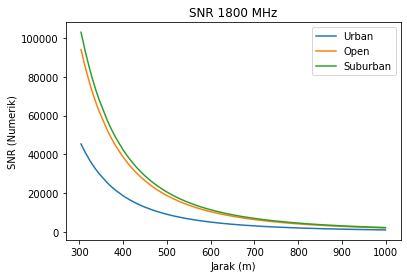

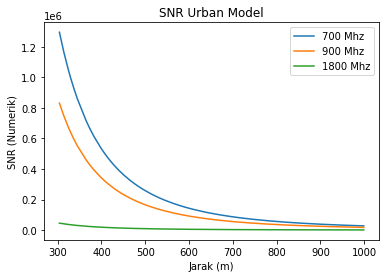

In [37]:
#SNR Frekuensi 1800 MHz
plt.figure()
plt.title("SNR 1800 MHz")
plt.plot(d_sort, SNRUrban, label = "Urban")
plt.plot(d_sort, SNROpen, label = "Open")
plt.plot(d_sort, SNRSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

#SNR Urban Model
plt.figure()
plt.title("SNR Urban Model")
plt.plot(d_sort, SNRUrban3, label = "700 Mhz")
plt.plot(d_sort, SNRUrban2, label = "900 Mhz")
plt.plot(d_sort, SNRUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()


In [38]:
#Kapasitas Seluler 
def kapasitas (sig, BW):
  kpssel = BW*(np.log2(1+sig))
  return kpssel

In [39]:
KapasitasUrban = kapasitas(SNRUrban, bw)
KapasitasSuburban = kapasitas(SNRSuburban, bw)
KapasitasOpen = kapasitas(SNROpen, bw)
KapasitasUrban2 = kapasitas(SNRUrban2, bw)
KapasitasUrban3 = kapasitas(SNRUrban3, bw)

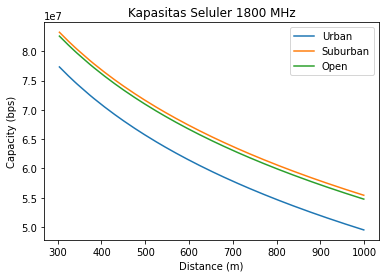

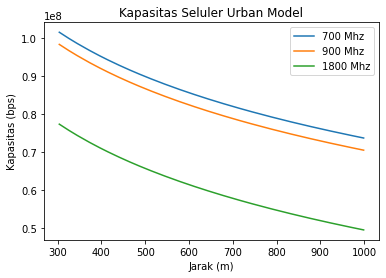

In [40]:
#Kapasitas Seluler 1800 Mhz
plt.figure()
plt.title("Kapasitas Seluler 1800 MHz")
plt.plot(d_sort,KapasitasUrban, label = "Urban")
plt.plot(d_sort,KapasitasSuburban, label = "Suburban")
plt.plot(d_sort,KapasitasOpen, label = "Open")
plt.xlabel('Distance (m)')
plt.ylabel('Capacity (bps)')
plt.legend()
plt.show()

#Kapasitas Seluler Urban Model 
plt.figure()
plt.title("Kapasitas Seluler Urban Model")
plt.plot(d_sort, KapasitasUrban3, label = "700 Mhz")
plt.plot(d_sort, KapasitasUrban2, label = "900 Mhz")
plt.plot(d_sort, KapasitasUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()